# **Lab 12**

## **(Freeman) Chain code**

Chain code for contour 1: [5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 6, 4, 5, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 7, 6, 5, 4, 5, 6, 4, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 7, 1, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 4, 5, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 3, 1, 0, 1, 0, 1, 4, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 5, 4, 5, 4, 4, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 5, 7, 7, 7, 6, 7, 6, 6, 5, 5, 5, 5, 6, 0, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 3, 3, 3, 4, 4, 5, 4, 3, 2, 2, 3, 2, 2, 0, 1, 2, 3, 2, 3, 2, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3]


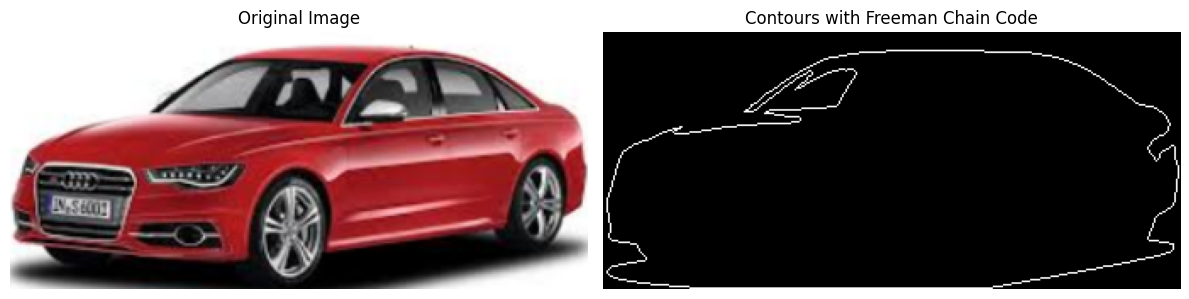

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def freeman_chain_code(contour):
    chain_code = []
    for i in range(1, len(contour)):
        diff = contour[i] - contour[i - 1]
        if diff[0][0] == 1 and diff[0][1] == 0:
            chain_code.append(0)
        elif diff[0][0] == 1 and diff[0][1] == -1:
            chain_code.append(1)
        elif diff[0][0] == 0 and diff[0][1] == -1:
            chain_code.append(2)
        elif diff[0][0] == -1 and diff[0][1] == -1:
            chain_code.append(3)
        elif diff[0][0] == -1 and diff[0][1] == 0:
            chain_code.append(4)
        elif diff[0][0] == -1 and diff[0][1] == 1:
            chain_code.append(5)
        elif diff[0][0] == 0 and diff[0][1] == 1:
            chain_code.append(6)
        elif diff[0][0] == 1 and diff[0][1] == 1:
            chain_code.append(7)
    return chain_code

# Read the image
img = cv2.imread("/content/car.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate Freeman Chain Code for each contour
all_chain_codes = [freeman_chain_code(contour) for contour in contours]

# Visualize the result
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Image with Contours
img_contours = np.zeros_like(img_gray)
cv2.drawContours(img_contours, contours, -1, (255, 255, 255), 1)

plt.subplot(1, 2, 2)
plt.imshow(img_contours, cmap='gray')
plt.title('Contours with Freeman Chain Code')
plt.axis('off')

# Display the chain codes (just as text in the console for this example)
for i, chain_code in enumerate(all_chain_codes):
    print(f"Chain code for contour {i + 1}: {chain_code}")

plt.tight_layout()
plt.show()

## **Histogram Oriented Gardiant (HOG)**

<ipython-input-2-73ff4a561a90>:9: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)


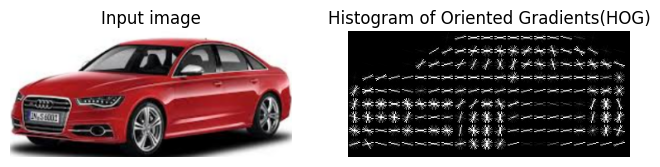

In [ ]:
#HOG
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from skimage.io import imread

image = imread('/content/car.png')

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients(HOG)')

plt.show()

## **Local Binary Pattern (LBP)**


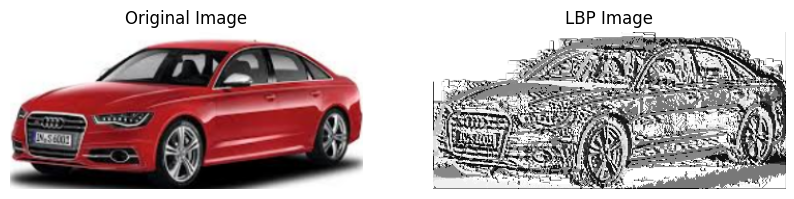

In [ ]:
#LBP
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
    # Now, we need to convert binary values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val

path = '/content/car.png'
img_bgr = cv2.imread(path, 1)
height, width, _ = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_lbp = np.zeros((height, width), np.uint8)

for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(img_lbp, cmap = 'gray')
axes[1].set_title('LBP Image')
axes[1].axis('off')

plt.show()

## **Skeleton**

(-0.5, 340.5, 151.5, -0.5)

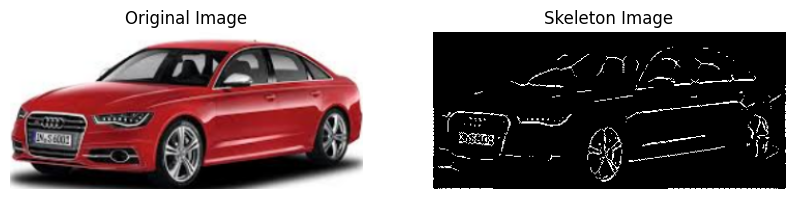

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
img = cv2.imread('/content/car.png')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, img = cv2.threshold(gray, 127, 255, 0)

# Step 1: Create an empty skeleton
skel = np.zeros(img.shape, np.uint8)

# Define the structuring element
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

while True:
    # Step 2: Open the image
    opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)

    # Step 3: Subtract open from the original image
    temp = cv2.subtract(img, opened)

    # Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(img, element)

    skel = cv2.bitwise_or(skel, temp)
    img = eroded.copy()

    if cv2.countNonZero(img) == 0:
        break

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(skel, cmap = 'gray')
axes[1].set_title('Skeleton Image')
axes[1].axis('off')


## **Convex Hull**

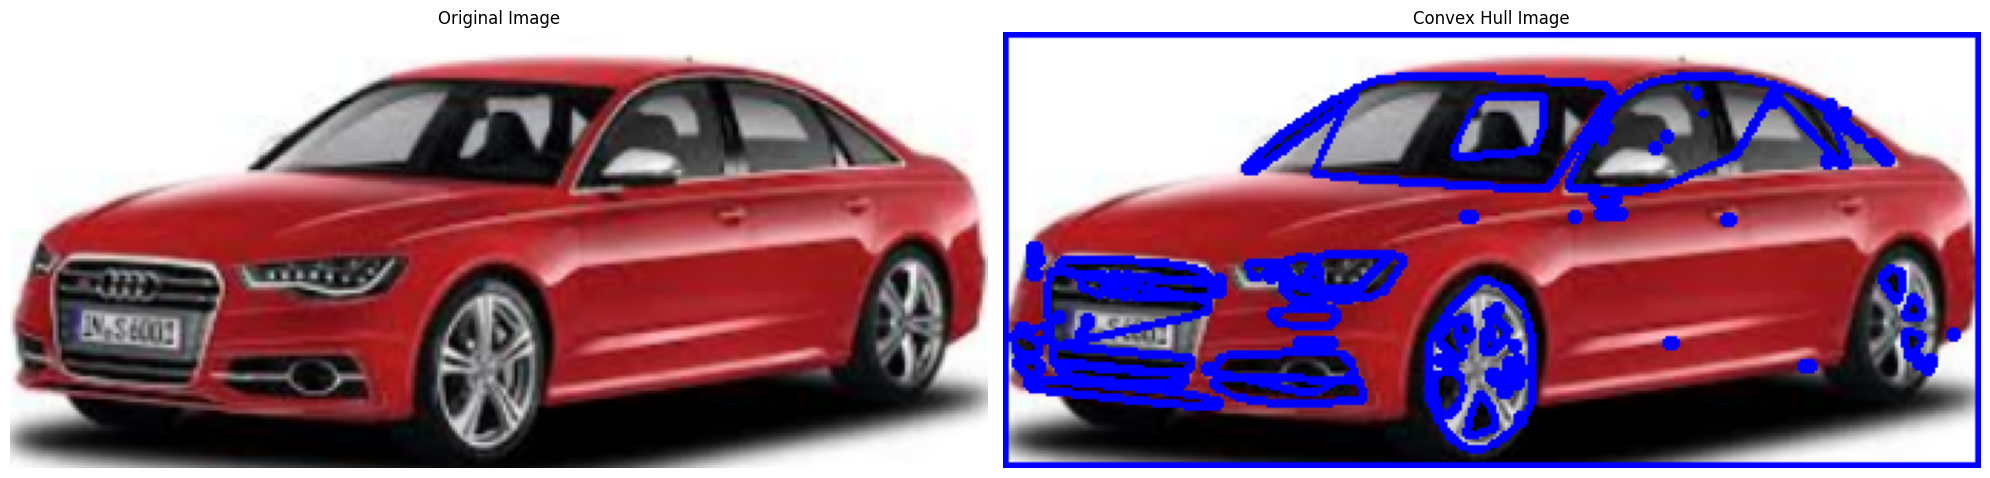

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img1 = cv2.imread('/content/car.png')

# Create a copy of the original image to draw contours on
img_with_hull = img1.copy()

# Convert it to grayscale
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Apply threshold
ret, thresh = cv2.threshold(img_gray, 50, 255, 0)

# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw convex hull on the copied image
for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    cv2.drawContours(img_with_hull, [hull], -1, (255, 0, 0), 2)

# Plotting
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Convex Hull Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_with_hull, cv2.COLOR_BGR2RGB))
plt.title('Convex Hull Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## **Bounding Box**

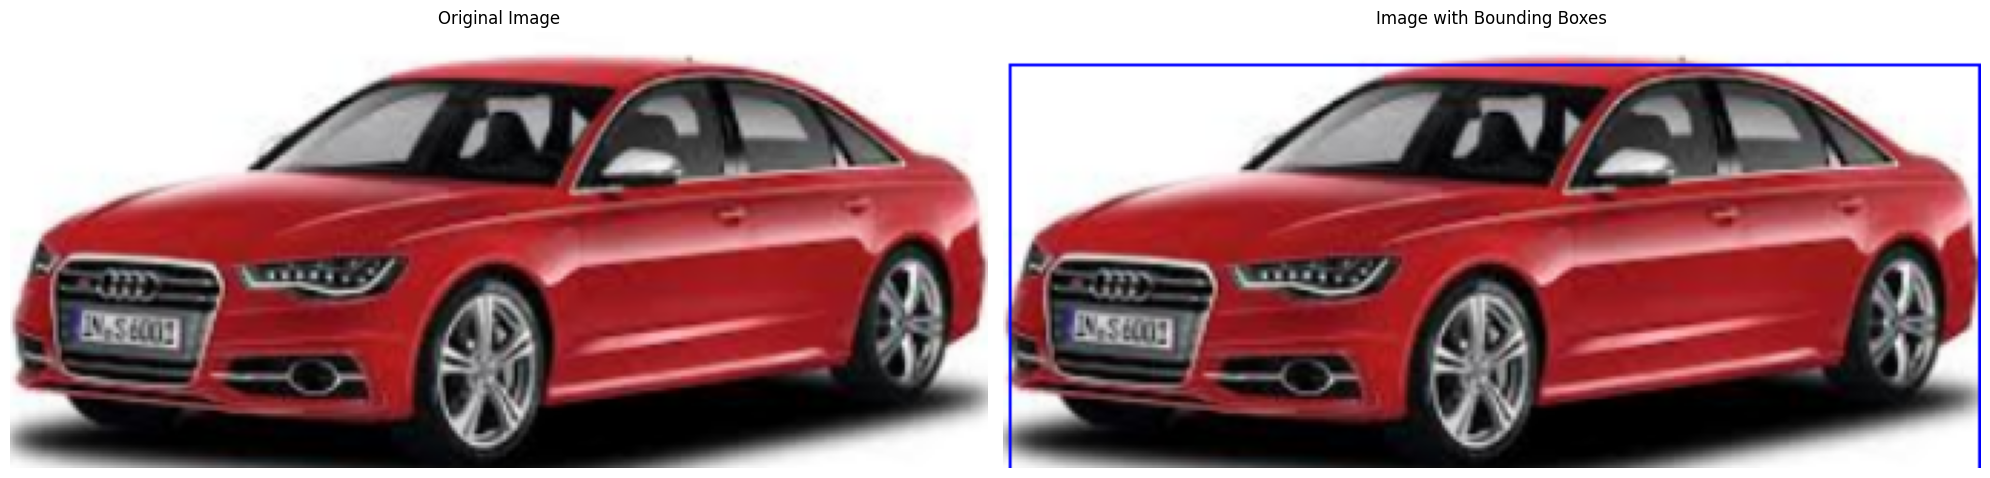

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Read the image
img = cv2.imread("/content/car.png")

# Create a copy of the original image to draw bounding boxes on
img_with_boxes = img.copy()

# Convert the image to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
thresh_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours
contours = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

# Draw bounding boxes
for i in contours:
    x, y, w, h = cv2.boundingRect(i)
    cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (255, 0, 0), 1)

# Convert BGR images to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_with_boxes_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

# Plotting
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Image with Bounding Boxes
plt.subplot(1, 2, 2)
plt.imshow(img_with_boxes_rgb)
plt.title('Image with Bounding Boxes')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Lab 12**
# **1. (Freeman) Chain code**
# **2. Histogram Oriented Gardiant (HOG)**
# **3. Local Binary Pattern (LBP)**
# **4. Skeleton**
# **5. Convex Hull**
# **6. Bounding Box**

<ipython-input-11-5b82e82b404b>:70: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)


Chain code for contour 1: [5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 6, 4, 5, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 7, 6, 5, 4, 5, 6, 4, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 7, 1, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 4, 5, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 3, 1, 0, 1, 0, 1, 4, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 5, 4, 5, 4, 4, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 5, 7, 7, 7, 6, 7, 6, 6, 5, 5, 5, 5, 6, 0, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 3, 3, 3, 4, 4, 5, 4, 3, 2, 2, 3, 2, 2, 0, 1, 2, 3, 2, 3, 2, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3]


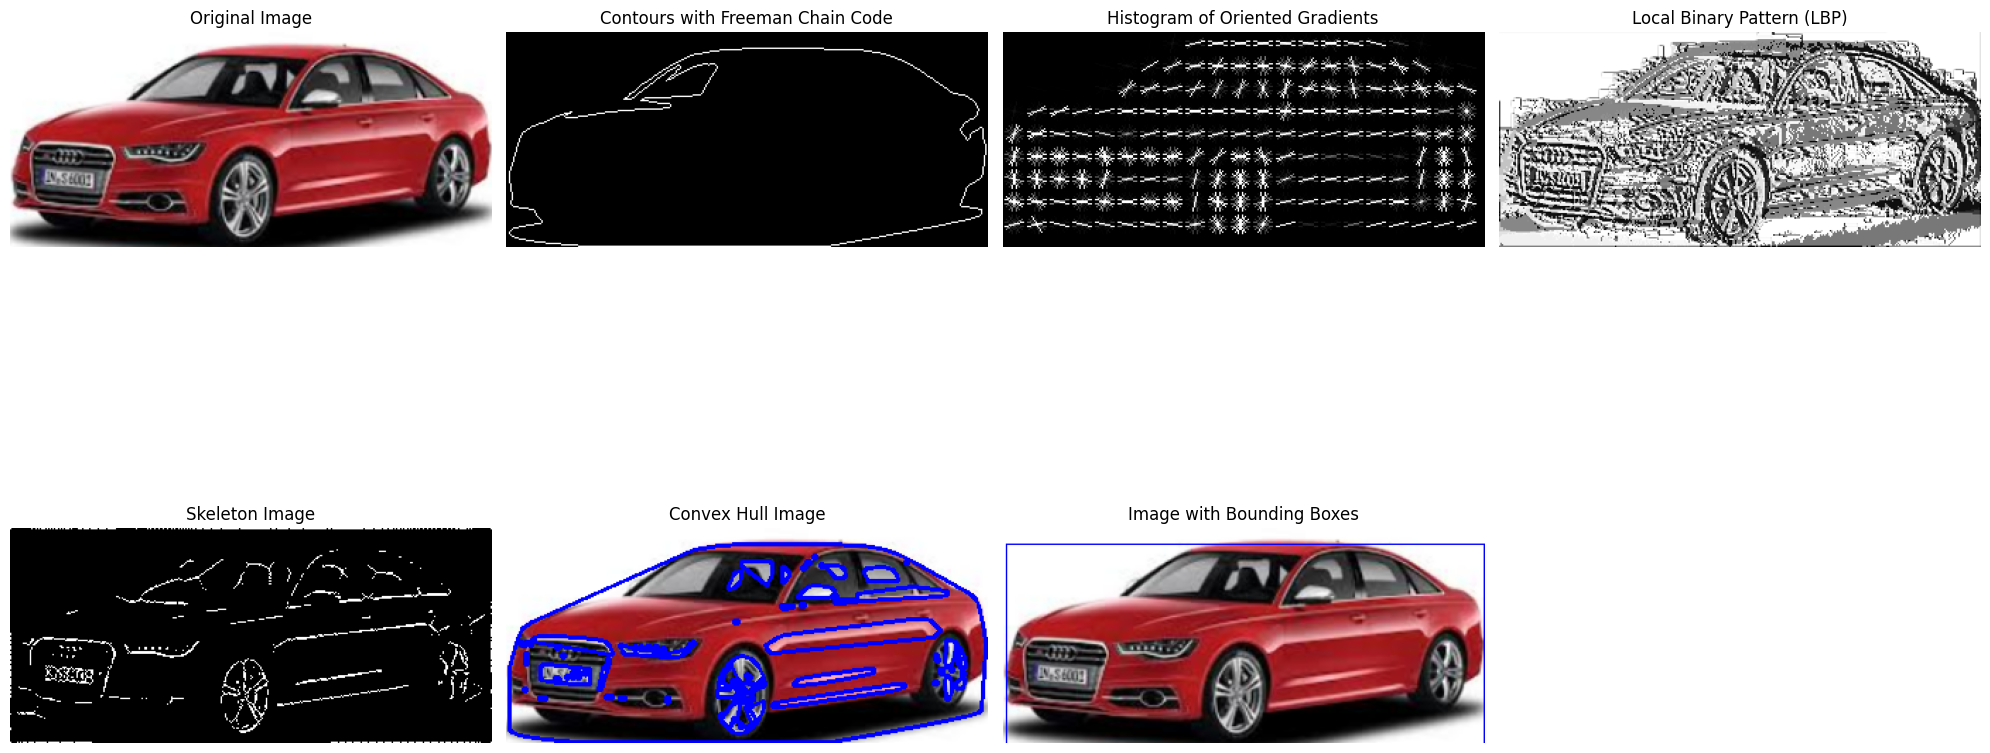

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from google.colab.patches import cv2_imshow

def freeman_chain_code(contour):
    chain_code = []
    for i in range(1, len(contour)):
        diff = contour[i] - contour[i - 1]
        if diff[0][0] == 1 and diff[0][1] == 0:
            chain_code.append(0)
        elif diff[0][0] == 1 and diff[0][1] == -1:
            chain_code.append(1)
        elif diff[0][0] == 0 and diff[0][1] == -1:
            chain_code.append(2)
        elif diff[0][0] == -1 and diff[0][1] == -1:
            chain_code.append(3)
        elif diff[0][0] == -1 and diff[0][1] == 0:
            chain_code.append(4)
        elif diff[0][0] == -1 and diff[0][1] == 1:
            chain_code.append(5)
        elif diff[0][0] == 0 and diff[0][1] == 1:
            chain_code.append(6)
        elif diff[0][0] == 1 and diff[0][1] == 1:
            chain_code.append(7)
    return chain_code

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y-1))  # top_left
    val_ar.append(get_pixel(img, center, x-1, y))    # top
    val_ar.append(get_pixel(img, center, x-1, y+1))  # top_right
    val_ar.append(get_pixel(img, center, x, y+1))    # right
    val_ar.append(get_pixel(img, center, x+1, y+1))  # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))    # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))  # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))    # left
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val

# Read the image
image_path = "/content/car.png"
# image_path = "/content/car.webp"
img = cv2.imread(image_path)

# Freeman Chain Code
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
all_chain_codes = [freeman_chain_code(contour) for contour in contours]
img_contours = np.zeros_like(img_gray)
cv2.drawContours(img_contours, contours, -1, (255, 255, 255), 1)

# HOG
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# LBP
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape
img_lbp = np.zeros((height, width), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

# Skeleton
_, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
skel = np.zeros(img_bin.shape, np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
while True:
    opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(img_bin, opened)
    eroded = cv2.erode(img_bin, element)
    skel = cv2.bitwise_or(skel, temp)
    img_bin = eroded.copy()
    if cv2.countNonZero(img_bin) == 0:
        break

# Convex Hull
img_with_hull = img.copy()
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    hull = cv2.convexHull(contour)
    cv2.drawContours(img_with_hull, [hull], -1, (255, 0, 0), 2)

# Bounding Box
img_with_boxes = img.copy()
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (255, 0, 0), 1)

# Display Freeman Chain Codes in the console
for i, chain_code in enumerate(all_chain_codes):
    print(f"Chain code for contour {i + 1}: {chain_code}")

# Plotting all results
plt.figure(figsize=(20, 20))

# Original Image
plt.subplot(4, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Freeman Chain Code Contours
plt.subplot(4, 4, 2)
plt.imshow(img_contours, cmap = 'gray')
plt.title('Contours with Freeman Chain Code')
plt.axis('off')

# HOG
plt.subplot(4, 4, 3)
plt.imshow(hog_image_rescaled, cmap = 'gray')
plt.title('Histogram of Oriented Gradients')
plt.axis('off')

# LBP
plt.subplot(4, 4, 4)
plt.imshow(img_lbp, cmap = 'gray')
plt.title('Local Binary Pattern (LBP)')
plt.axis('off')

# Skeleton
plt.subplot(4, 4, 5)
plt.imshow(skel, cmap = 'gray')
plt.title('Skeleton Image')
plt.axis('off')

# Convex Hull
plt.subplot(4, 4, 6)
plt.imshow(cv2.cvtColor(img_with_hull, cv2.COLOR_BGR2RGB))
plt.title('Convex Hull Image')
plt.axis('off')

# Bounding Boxes
plt.subplot(4, 4, 7)
plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.title('Image with Bounding Boxes')
plt.axis('off')

plt.tight_layout()
plt.show()